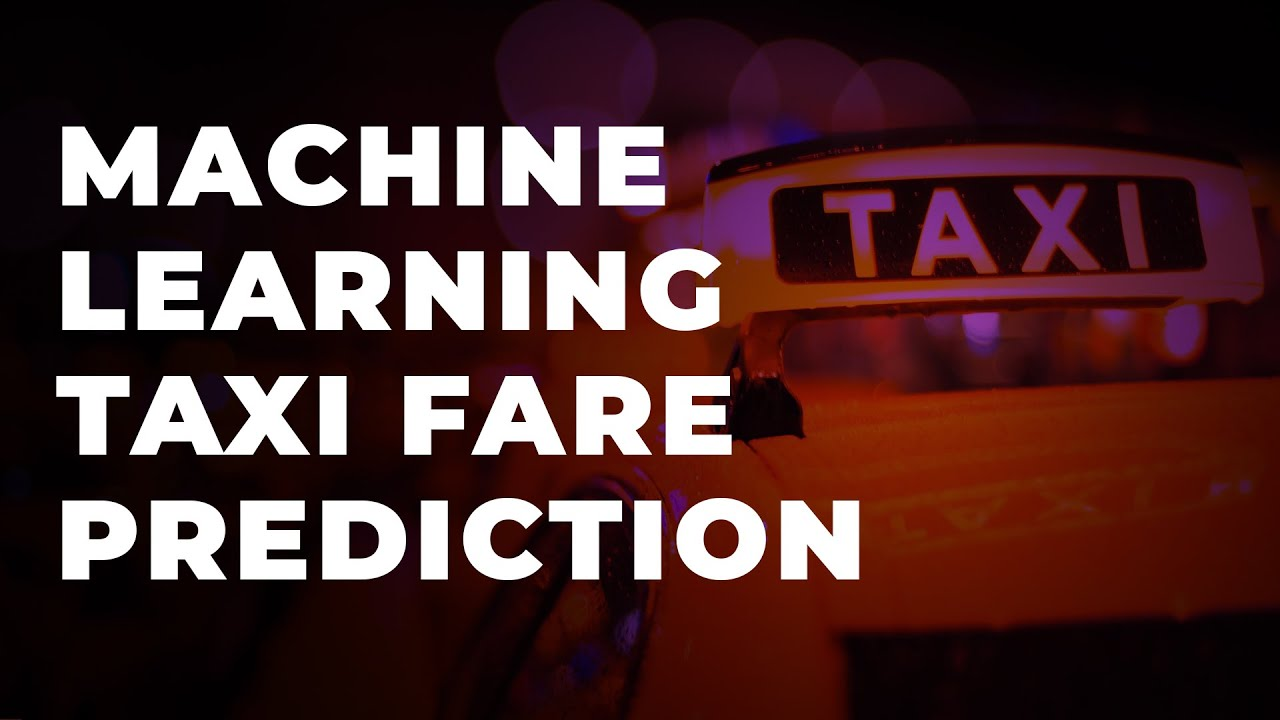

This dataset tries to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities.

The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this historical dataset that includes records of taxi trip details and fares of those trips, poses an interesting opportunity for Data Scientists.

Using this dataset, they can build machine learning models for predicting the trip fare based on the given other useful features of the trip. This project solves a lot of problems faced both by Taxi operators and the customers taking the trip.

### Data Dictionary
- Trip_distance: The elapsed trip distance in miles reported by the taximeter.
- Rate_code: The final rate code is in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark, 4=Nassau or Westchester, 5=Negotiated fare,6=Group ride
- Storeandfwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor and determines if the trip was stored in the server and forwarded to the vendor. Y= store and forward trip N= not a store and forward trip
- Payment_type: A numeric code signifying how the passenger paid for the trip. 1= Credit card,2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip
- Fare_amount: The time-and-distance fare calculated by the meter
- Extra: Miscellaneous extras and surcharges.
- Mta_tax: 0.50 Dollar MTA tax that is automatically triggered based on the metered rate in use.
- Tip_amount: Tip amount credited to the driver for credit card transactions.
- Tolls_amount: Total amount of all tolls paid in the trip.
- Imp_surcharge: 0.30 Dollar extra charges added automatically to all rides
- Total_amount: The total amount charged to passengers. Does not include cash tips
- Pickuplocationid: TLC Taxi Zone in which the taximeter was engaged
- Dropofflocationid: TLC Taxi Zone in which the taximeter was disengaged
- Year: The year in which the taxi trip was taken.
- Month: The month on which the taxi trip was taken.
- Day: The day on which the taxi trip was taken.
- Day_of_week: The day of the week on which the taxi trip was taken
- Hour_of_day: Used to determine the hour of the day in 24 hours format
- Trip_duration: The total duration of the trip in seconds
- calculated_total_amount: The total amount the customer has to pay for the taxi.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-prediction/train.csv
/kaggle/input/taxi-fare-prediction/test.csv


In [2]:
# Import the Libraries and the Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [86]:
train=pd.read_csv('/kaggle/input/taxi-fare-prediction/train.csv')
test=pd.read_csv('/kaggle/input/taxi-fare-prediction/test.csv')

In [5]:
# List of the Numerical Vars...

train.select_dtypes(include = np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [35]:
#Value_Count_Analysis
for i in train.columns:
    print(train[i].value_counts())
    print()

trip_distance
8.70     213
8.60     212
9.20     210
6.70     209
9.00     202
        ... 
21.29      1
20.87      1
24.06      1
38.87      1
21.11      1
Name: count, Length: 2317, dtype: int64

rate_code
1    33664
3      650
5      501
4      182
2        3
Name: count, dtype: int64

store_and_fwd_flag
N    34823
Y      177
Name: count, dtype: int64

payment_type
1    30899
2     3926
3      132
4       43
Name: count, dtype: int64

fare_amount
21.50     1474
22.00     1358
22.50     1286
23.00     1254
23.50     1229
          ... 
69.25        1
156.00       1
8.03         1
72.56        1
35.04        1
Name: count, Length: 360, dtype: int64

extra
0.0     18139
0.5     11401
1.0      5454
17.5        2
1.5         2
18.5        1
0.8         1
Name: count, dtype: int64

mta_tax
0.5    34085
0.0      915
Name: count, dtype: int64

tip_amount
0.00     5103
4.00     1007
6.00      582
4.66      453
10.00     432
         ... 
8.54        1
21.36       1
17.40       1
28.50       

#### Dropping Unnecessary Columns

In [87]:
#Delete - Year, Imp Surcharge since they add no value to the analysis
train.drop(columns=['year', 'imp_surcharge'], inplace=True)
test.drop(columns=['year', 'imp_surcharge'], inplace=True)

### Univariate Analysis

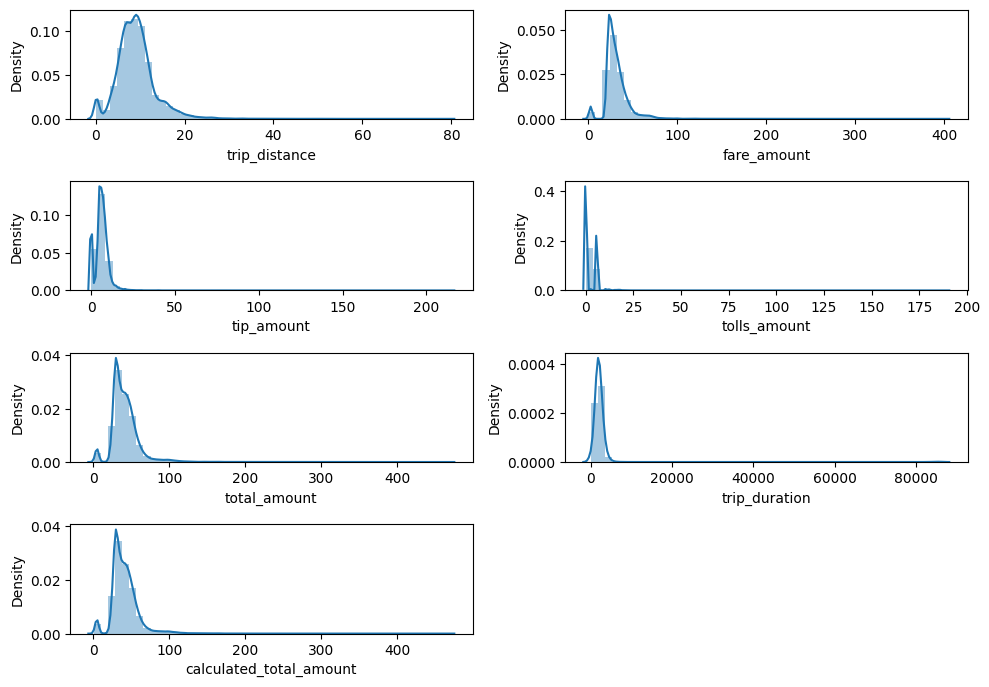

In [5]:
num_cols = ['trip_distance', 'fare_amount',
             'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration','calculated_total_amount']

nrows = 4
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(train.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

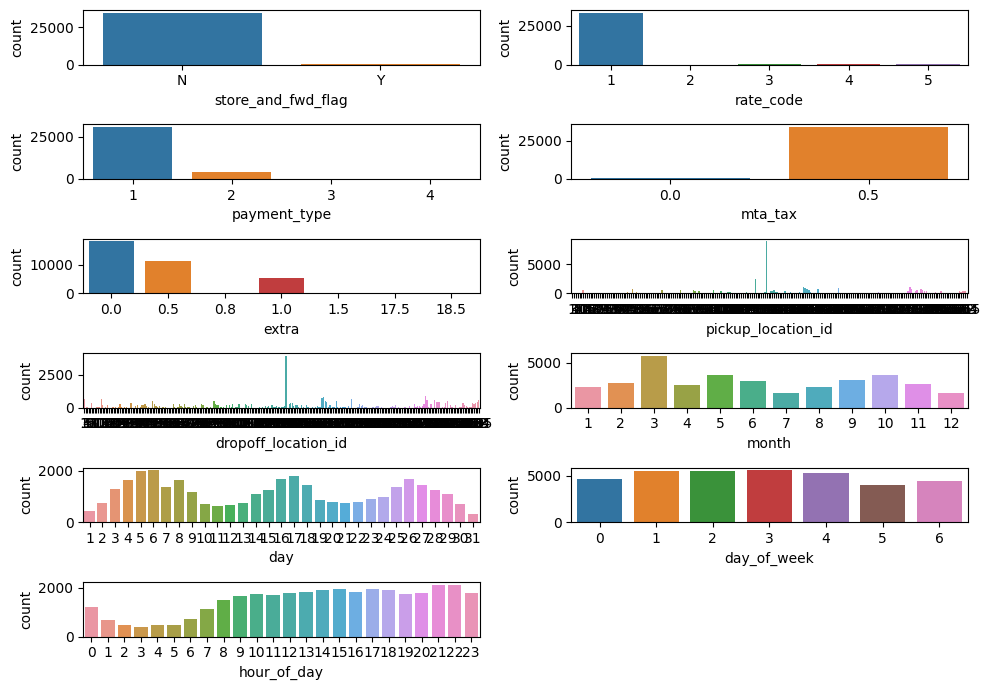

In [6]:
cat_cols = ['store_and_fwd_flag', 'rate_code', 
            'payment_type', 'mta_tax', 'extra', 'pickup_location_id', 
            'dropoff_location_id',
            'month', 'day', 'day_of_week', 'hour_of_day']

nrows = 6
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(x=train.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

### Bivariate Analysis

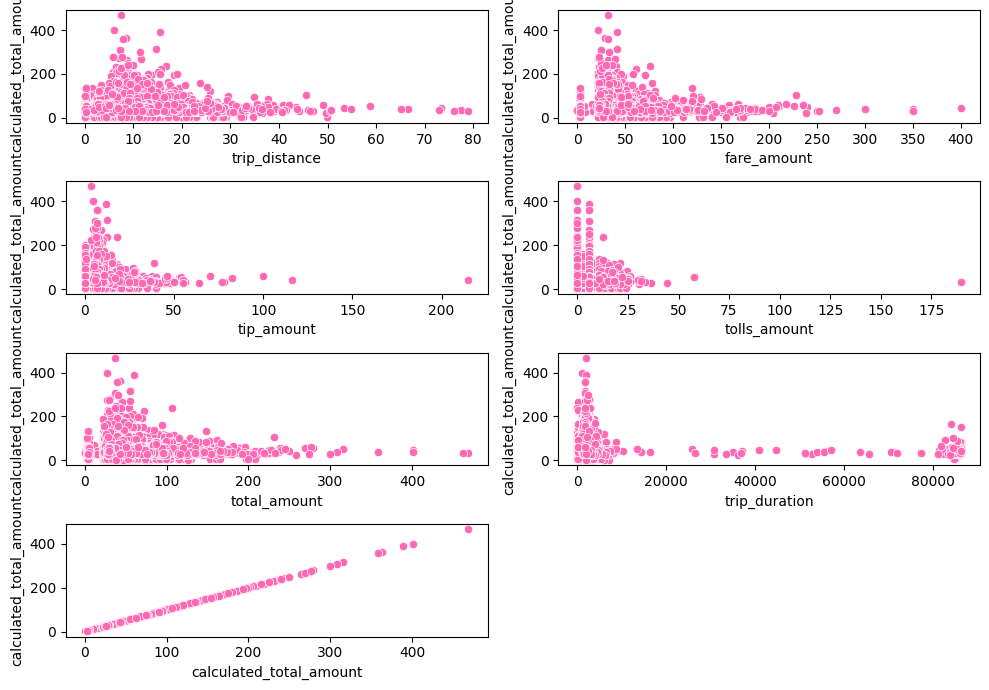

In [42]:
# Numerical Variables : Scatterplot
nrows = 4
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(x=train[i], 
                    y=train.calculated_total_amount, 
                   color = "hotpink")
    iterator = iterator+1

plt.tight_layout()
plt.show()

**Inference:**

- Clearly, there seems to be certain factors which are altering the fare amount so drastically. With trip distance being small, calculated_total_amount is high and for higher distance fare amount is so low. Similar is the case with fare_amount, tolls_amount, trip_duration, total_amount.
- In summary, all the columns which should be directly related to the calculated_total_amount are inversely related.

<Axes: >

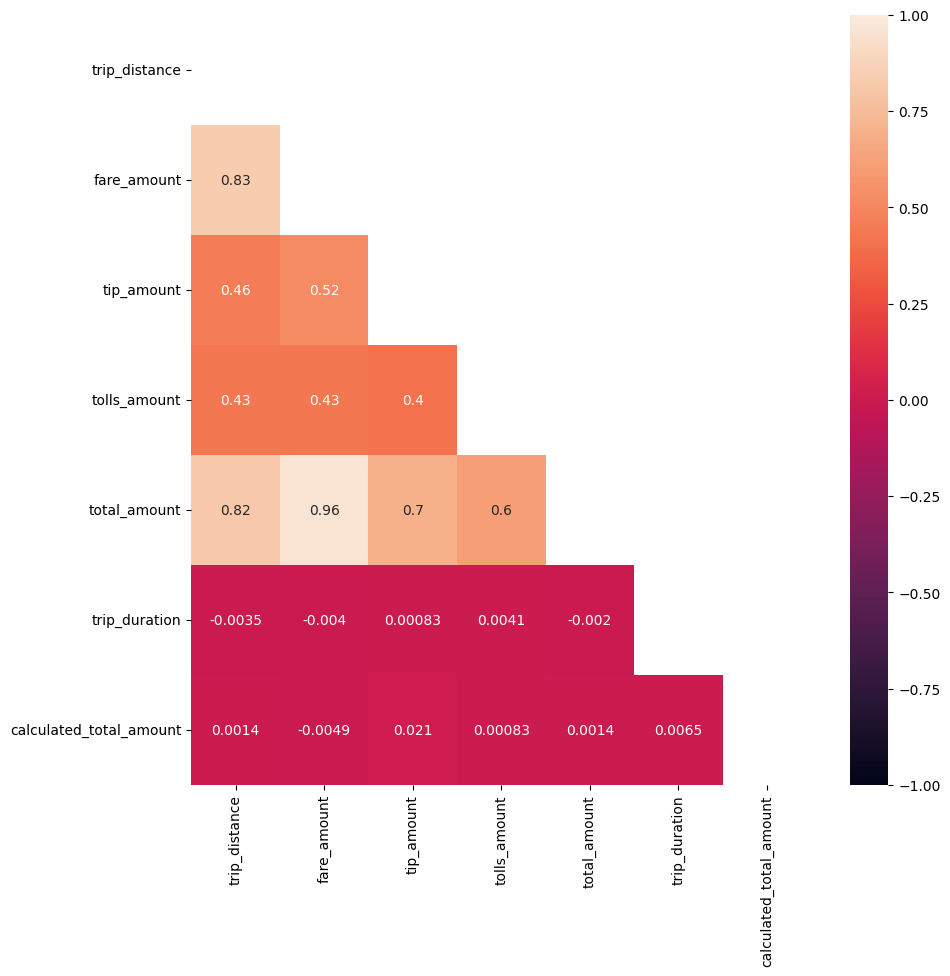

In [43]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[num_cols].corr(), annot=True, vmax=1,vmin=-1,
            mask=np.triu(train[num_cols].corr()))

Correlation however is telling a different story. It shows there is no such relation among the above said columns with the target columns.

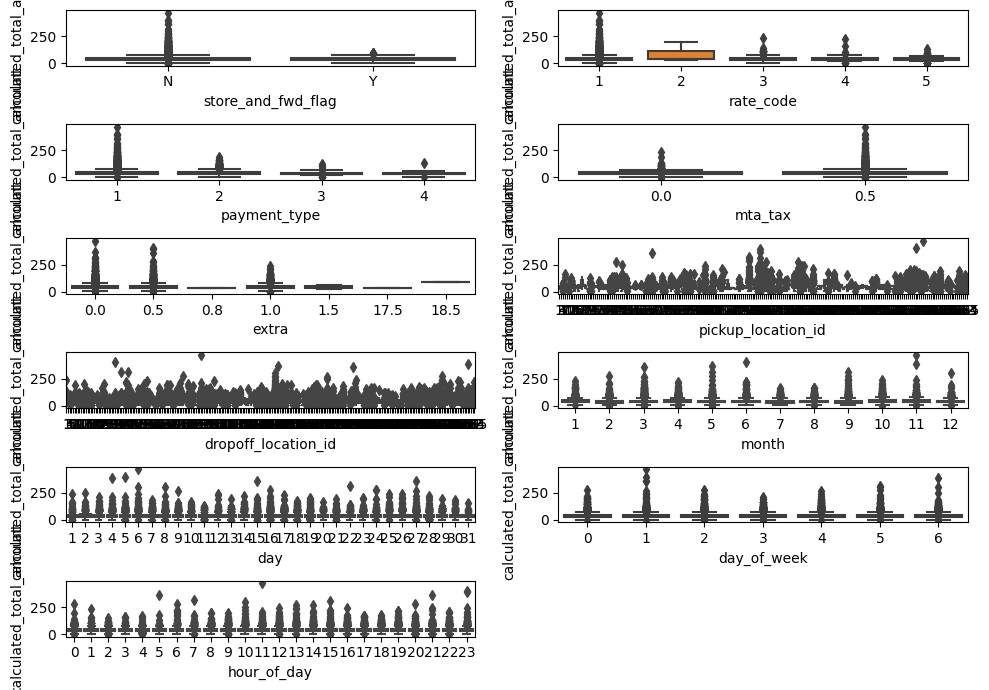

In [41]:
# Bivariate Categorical

nrows = 6
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(x=train.loc[:, i], 
                y=train.calculated_total_amount)
    iterator = iterator+1

plt.tight_layout()
plt.show()

**Inference:**
The month, day, day of week, hour, columns show the variablity in the fare. Rate card 1 shows the maximum variability

### Multivariate Analysis

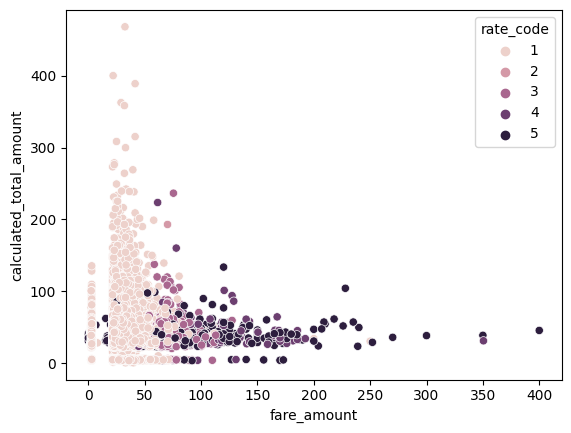

In [13]:
sns.scatterplot(x = "fare_amount", y = "calculated_total_amount",
               data = train, hue = "rate_code")
plt.show()

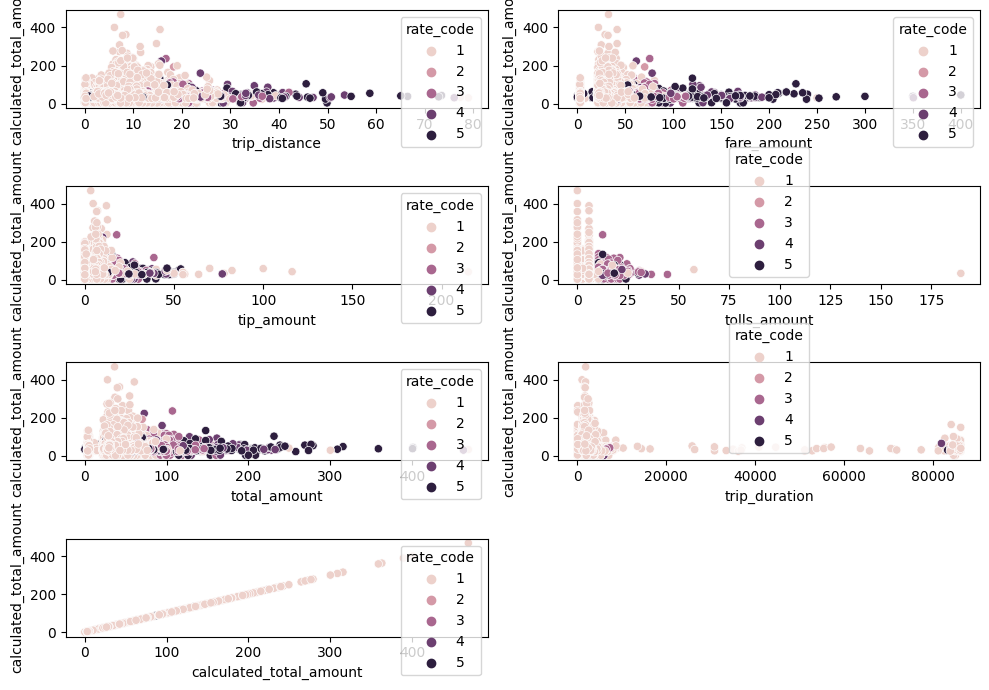

In [44]:
# Numerical Vars...
nrows = 4
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(x=train.loc[:, i], 
                    y=train.calculated_total_amount, 
                    hue=train.rate_code)
    iterator = iterator+1

plt.tight_layout()
plt.show()

**Inference:**

Clearly, the rate card column is the one altering the natural behavior of prices. Let's look into it and dive into the analysis.

In [15]:
train[train.rate_code==1]

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,22.43,1,N,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,132,259,2018,5,23,2,23,2998.0,29.76
34996,9.16,1,N,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,24,138,2018,4,4,2,9,1419.0,29.15
34997,6.78,1,N,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,140,231,2018,3,7,2,8,2459.0,42.67
34998,0.26,1,N,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,142,142,2018,4,18,2,8,1932.0,26.73


In [16]:
train.rate_code.value_counts(normalize=True)

rate_code
1    0.961829
3    0.018571
5    0.014314
4    0.005200
2    0.000086
Name: proportion, dtype: float64

In [17]:
# Above 96% of the data belongs to rate_code 1
train_1=train[train.rate_code==1]
train_1

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,22.43,1,N,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,132,259,2018,5,23,2,23,2998.0,29.76
34996,9.16,1,N,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,24,138,2018,4,4,2,9,1419.0,29.15
34997,6.78,1,N,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,140,231,2018,3,7,2,8,2459.0,42.67
34998,0.26,1,N,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,142,142,2018,4,18,2,8,1932.0,26.73


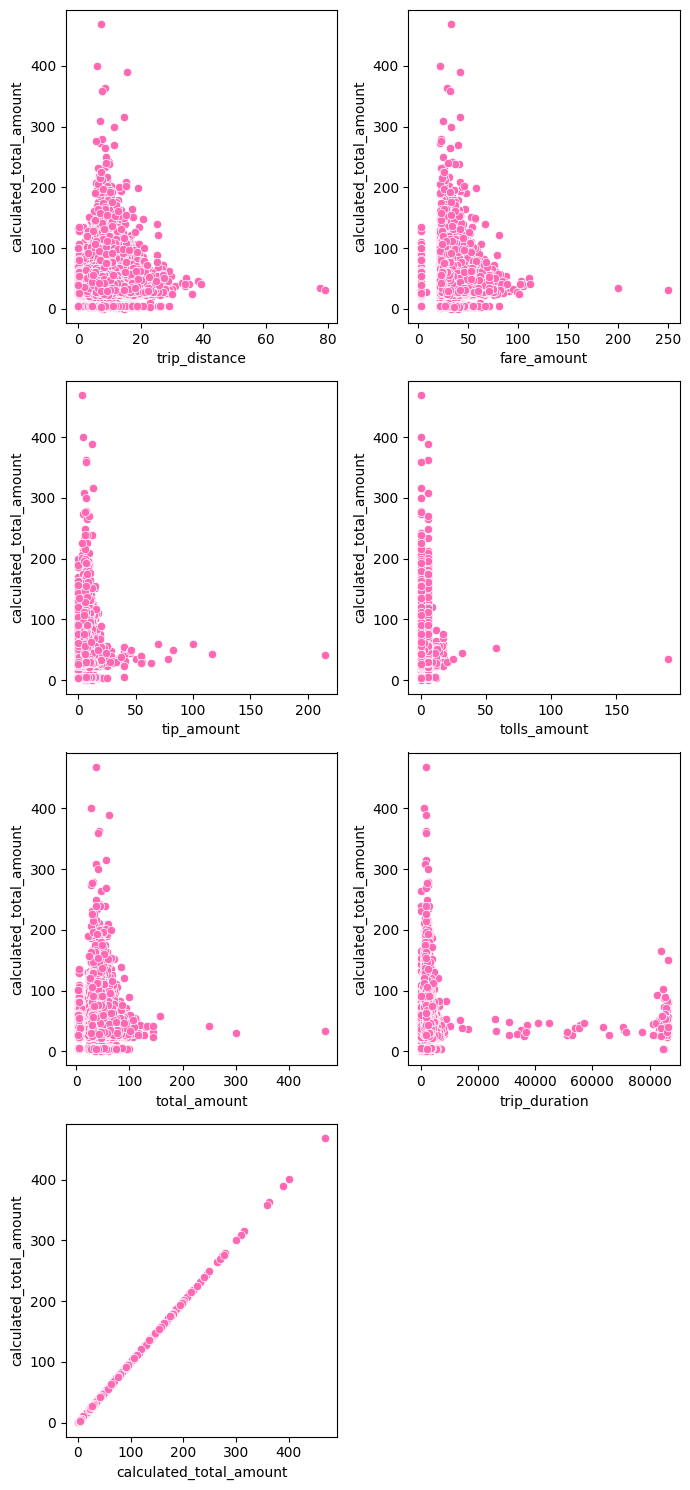

In [45]:
#Let's do the multivariate analysis on the rate code 1 data
nrows = 4
ncols =2
iterator = 1

plt.figure(figsize=(7, 15))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(x=train_1[i], 
                    y=train_1.calculated_total_amount, 
                   color = "hotpink")
    iterator = iterator+1

plt.tight_layout()
plt.show()

There is some weird behavior and is clearly not because of the rate card only

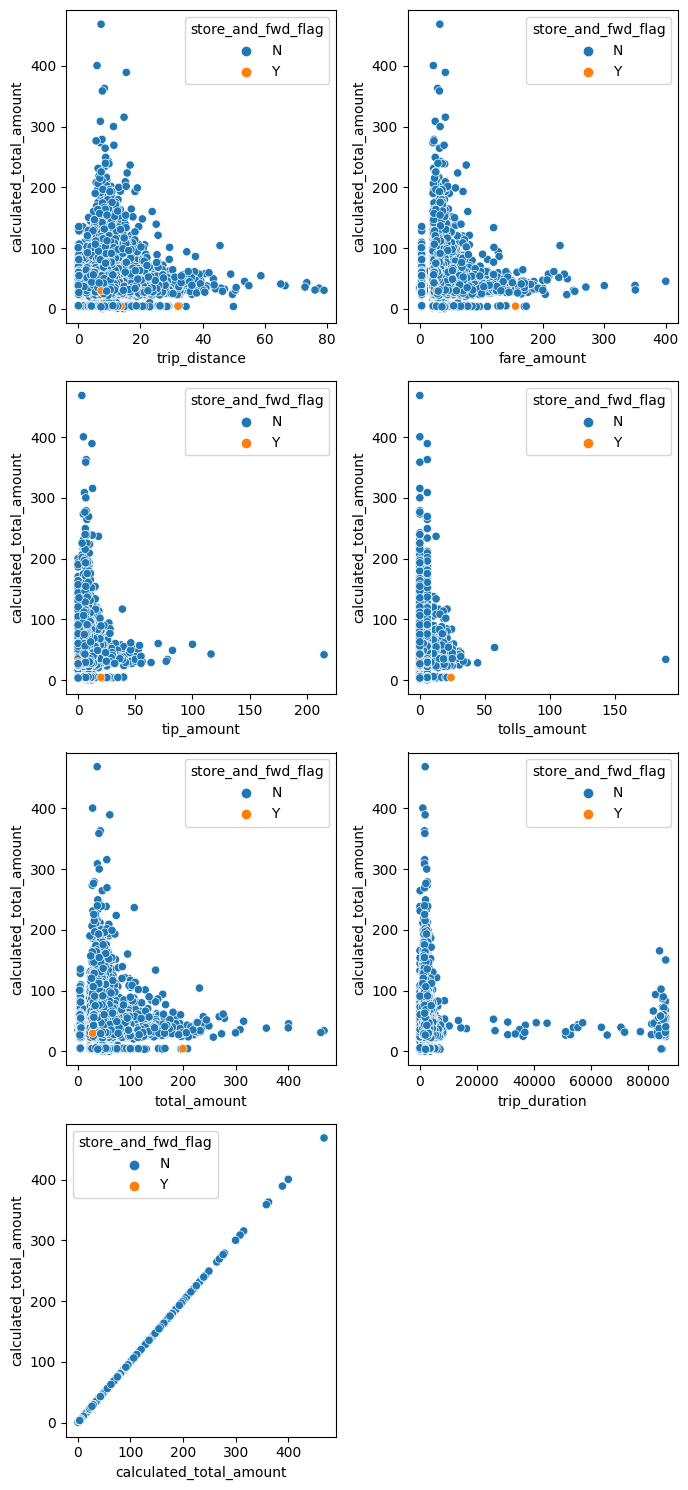

In [46]:
# Hue=Store_and_fwd_flag
nrows = 4
ncols =2
iterator = 1

plt.figure(figsize=(7, 15))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(x=train.loc[:, i], 
                    y=train.calculated_total_amount, 
                    hue=train.store_and_fwd_flag)
    iterator = iterator+1

plt.tight_layout()
plt.show()

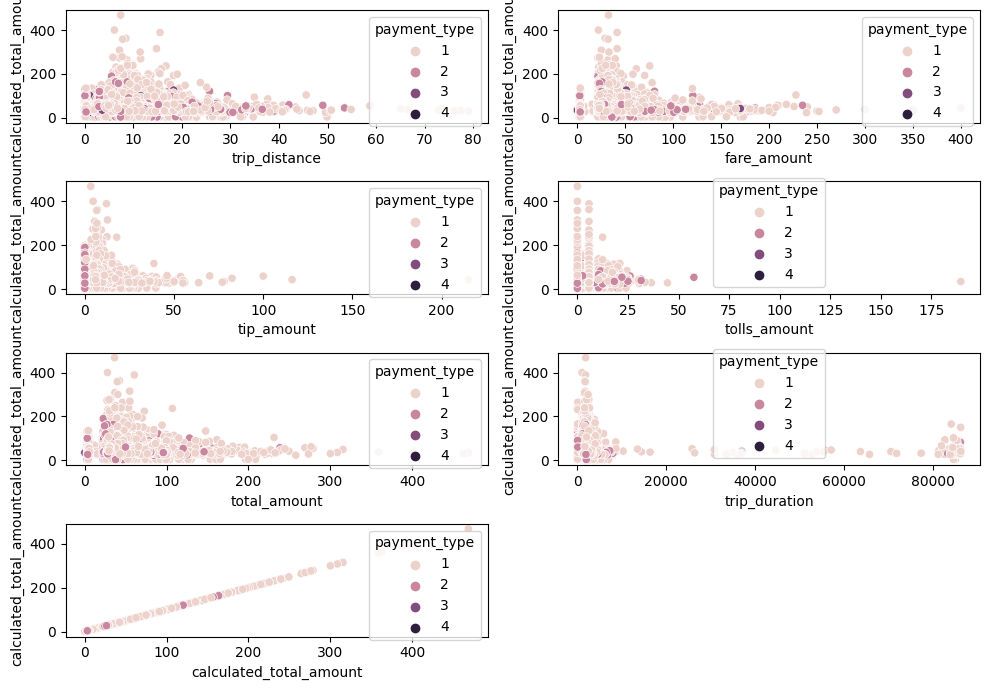

In [47]:
# Hue=Payment_Type
nrows = 4
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(x=train.loc[:, i], 
                    y=train.calculated_total_amount, 
                    hue=train.payment_type)
    iterator = iterator+1

plt.tight_layout()
plt.show()

### Missing Value

In [88]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

### Feature Engineering

In [89]:
# Converting Trip_Duration in hour
train['trip_duration']= train['trip_duration']/3600
test['trip_duration']= test['trip_duration']/3600

### Speed

In [90]:
# Speed can be a great factor in calculating the fare
train['speed']=train['trip_distance']/train['trip_duration']
test['speed']=test['trip_distance']/test['trip_duration']

<Axes: xlabel='speed', ylabel='calculated_total_amount'>

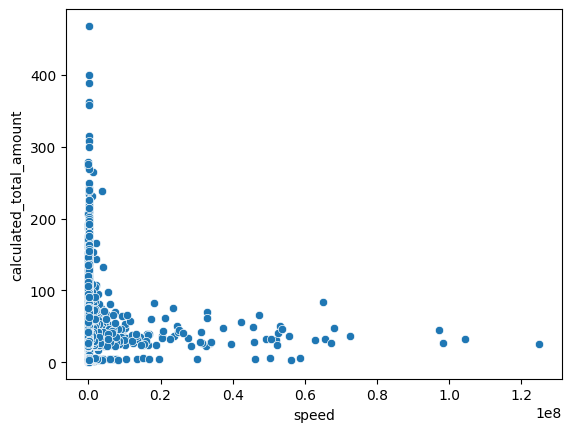

In [42]:
sns.scatterplot(x=train['speed'], y=train['calculated_total_amount'])

### Features from Locations(Pickup and Dropoff)

In [9]:
#Creating a feature from Locations
train['pickup_location_id'].value_counts().head(10)

pickup_location_id
138    8856
132    2401
230    1143
161    1057
162     983
186     853
48      786
231     725
163     716
236     699
Name: count, dtype: int64

In [10]:
train['dropoff_location_id'].value_counts().head(10)

dropoff_location_id
138    3932
230     877
162     789
161     771
13      668
181     646
1       637
231     606
236     591
265     572
Name: count, dtype: int64

In [91]:
train['pick_and_drop']=(train['pickup_location_id'].astype(str)+ '-'+ train['dropoff_location_id'].astype(str))
train['pick_and_drop']

0        262-138
1        263-236
2        138-230
3        186-138
4         162-87
          ...   
34995    132-259
34996     24-138
34997    140-231
34998    142-142
34999     132-66
Name: pick_and_drop, Length: 35000, dtype: object

In [92]:
test['pick_and_drop']=(test['pickup_location_id'].astype(str)+ '-'+ test['dropoff_location_id'].astype(str))

In [111]:
train[train['pick_and_drop']=='138-230'].describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,593.0,10.558988,1.347944,7.300000,9.500000,10.630000,11.400000,18.050000
rate_code,593.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
payment_type,593.0,1.077572,0.267722,1.000000,1.000000,1.000000,1.000000,2.000000
fare_amount,593.0,36.484823,5.805747,25.000000,32.500000,36.000000,39.500000,61.000000
extra,593.0,0.266442,0.380927,0.000000,0.000000,0.000000,0.500000,1.000000
mta_tax,593.0,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000
tip_amount,593.0,8.190236,3.181516,0.000000,7.410000,8.610000,10.000000,20.000000
tolls_amount,593.0,5.586105,2.454431,0.000000,5.760000,5.760000,5.760000,57.600000
total_amount,593.0,51.327605,7.664040,32.800000,46.320000,50.660000,55.270000,90.400000
pickup_location_id,593.0,138.000000,0.000000,138.000000,138.000000,138.000000,138.000000,138.000000


In [93]:
top_pickup=train['pickup_location_id'].value_counts().head(10).index.tolist()
top_dropoff=train['dropoff_location_id'].value_counts().head(10).index.tolist()
top_pickup, top_dropoff

([138, 132, 230, 161, 162, 186, 48, 231, 163, 236],
 [138, 230, 162, 161, 13, 181, 1, 231, 236, 265])

- **is_top_pickup** : If the location is in top 10 pickup locations
- **is_top_dropoff**: If the location is in top 10 dropoff locations

In [94]:
train['is_top_pickup']=train['pickup_location_id'].transform(lambda x:1 
                                                             if x in top_pickup else 0)
train['is_top_dropoff']=train['dropoff_location_id'].transform(lambda x:1 
                                                               if x in top_dropoff else 0)
test['is_top_pickup']=test['pickup_location_id'].transform(lambda x:1 
                                                             if x in top_pickup else 0)
test['is_top_dropoff']=test['dropoff_location_id'].transform(lambda x:1 
                                                               if x in top_dropoff else 0)

<Axes: xlabel='is_top_pickup', ylabel='calculated_total_amount'>

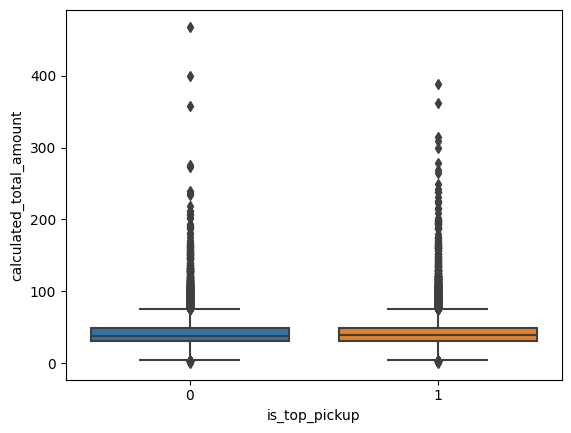

In [126]:
sns.boxplot(x=train['is_top_pickup'], y=train['calculated_total_amount'])

<Axes: xlabel='is_top_dropoff', ylabel='calculated_total_amount'>

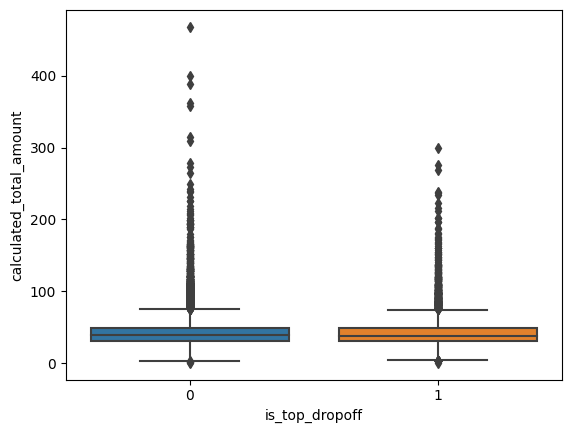

In [127]:
sns.boxplot(x=train['is_top_dropoff'], y=train['calculated_total_amount'])

- **is_popular_route**: If a particular location combination, pickup and dropoff is among the popular ones.

In [95]:
popular_route = train['pick_and_drop'].value_counts().head(10).index.tolist()

In [96]:
train['is_popular_route']= train['pick_and_drop'].transform(lambda x: 1 
                                                            if x in popular_route else 0)
test['is_popular_route']= test['pick_and_drop'].transform(lambda x: 1 
                                                            if x in popular_route else 0)

<Axes: xlabel='is_popular_route', ylabel='calculated_total_amount'>

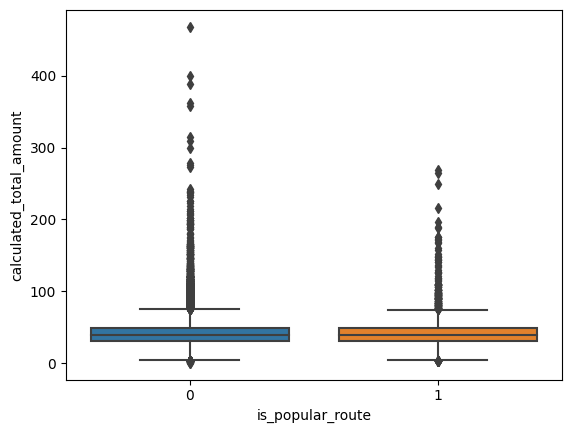

In [41]:
sns.boxplot(x=train['is_popular_route'], y=train.calculated_total_amount)

### Calculating Time based features

**is_peak_month**: If a particular month is a peak month.

<Axes: xlabel='month', ylabel='calculated_total_amount'>

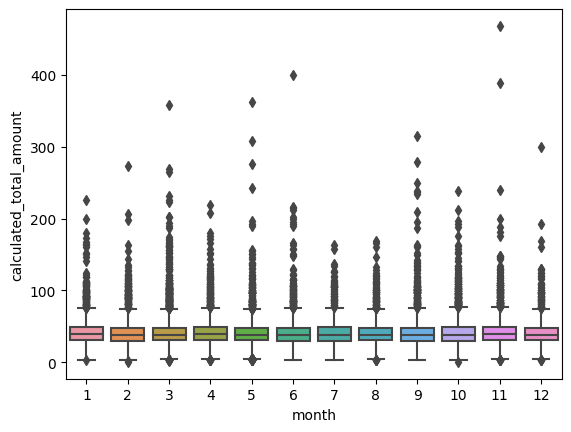

In [66]:
sns.boxplot(x=train['month'], y=train['calculated_total_amount'])

In [97]:
#Based on the above plot, 
li=[2,3,5,6,9,11]
train['is_peak_month']=train['month'].transform(lambda x: 1 if x in li else 0)
test['is_peak_month']=test['month'].transform(lambda x: 1 if x in li else 0)

<Axes: xlabel='is_peak_month', ylabel='calculated_total_amount'>

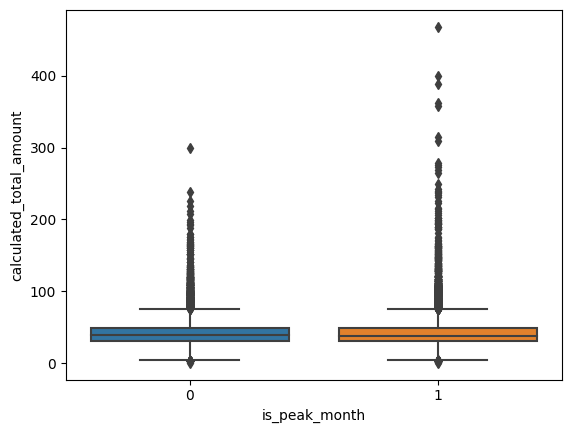

In [132]:
sns.boxplot(x=train['is_peak_month'], y=train['calculated_total_amount'])

**is_peak_day**: If a particular day is a peak day.

<Axes: xlabel='day_of_week', ylabel='calculated_total_amount'>

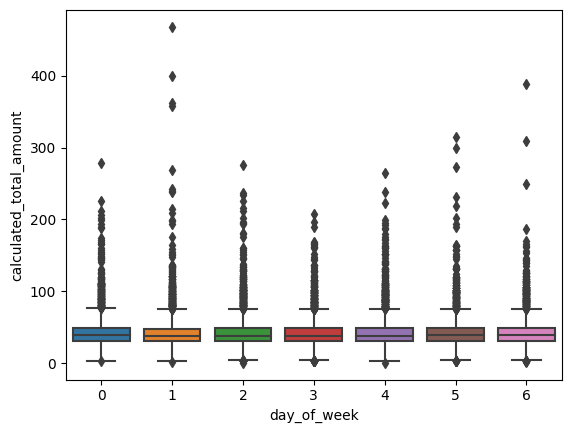

In [134]:
# Creating a feature for Peak_Day
sns.boxplot(x=train['day_of_week'], y=train['calculated_total_amount'])

In [98]:
train['is_peak_day']=train['day_of_week'].transform(lambda x: 1 if x in (1,5,6) else 0)
test['is_peak_day']=test['day_of_week'].transform(lambda x: 1 if x in (1,5,6) else 0)

<Axes: xlabel='is_peak_day', ylabel='calculated_total_amount'>

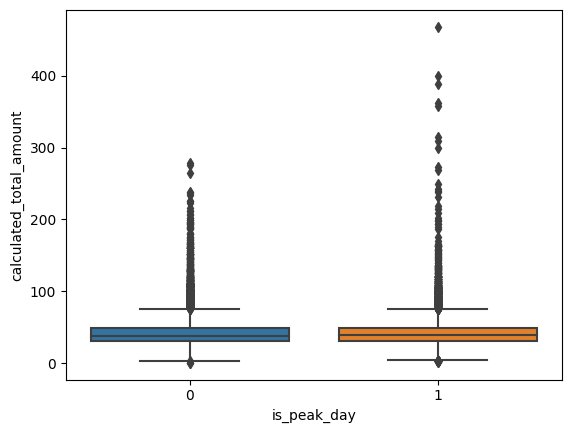

In [142]:
sns.boxplot(x=train['is_peak_day'], y=train['calculated_total_amount'])

**is_peak_hour**: If a particular hour is a peak hour.

<Axes: xlabel='hour_of_day', ylabel='calculated_total_amount'>

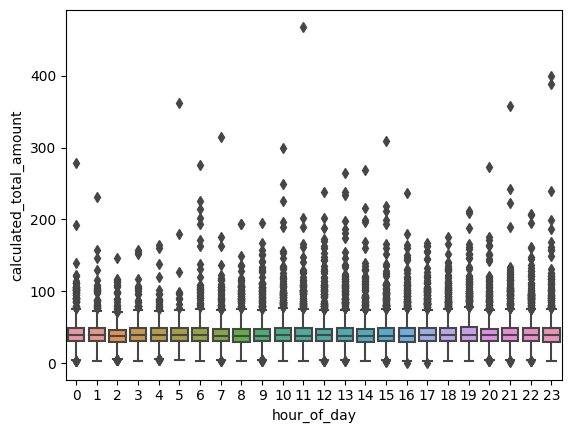

In [145]:
#Creating a feature for peak_hour
sns.boxplot(x=train['hour_of_day'], y=train['calculated_total_amount'])

In [99]:
peak=[0,1,5,6,7,10,11,12,13,14,15,21,22,23]
train['is_peak_hour']=train['hour_of_day'].transform(lambda x: 1 if x in peak else 0)
test['is_peak_hour']=test['hour_of_day'].transform(lambda x: 1 if x in peak else 0)

<Axes: xlabel='is_peak_hour', ylabel='calculated_total_amount'>

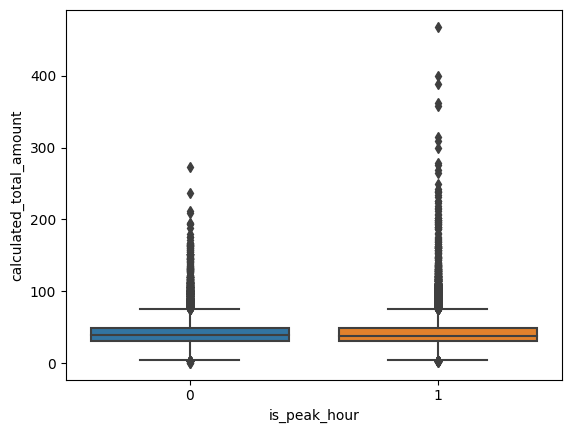

In [151]:
sns.boxplot(x=train['is_peak_hour'], y=train['calculated_total_amount'])

### Modifying Few Columns for better pattern recognition

#### Rate_code

In [51]:
train['rate_code'].value_counts()

rate_code
1    33664
3      650
5      501
4      182
2        3
Name: count, dtype: int64

In [100]:
def change_rate(num):
    if num ==2:
        return 3
    elif num==4:
        return 5
    else:
        return num

In [101]:
train['rate_code']= train['rate_code'].apply(change_rate)
test['rate_code']= test['rate_code'].apply(change_rate)

In [102]:
train['rate_code'].value_counts()

rate_code
1    33664
5      683
3      653
Name: count, dtype: int64

#### Payment Type

In [61]:
train.payment_type.value_counts()

payment_type
1    30899
2     3926
3      132
4       43
Name: count, dtype: int64

In [103]:
train['payment_type'] = train['payment_type'].transform(lambda x: 1 if x==1 else 0)
test['payment_type'] = test['payment_type'].transform(lambda x: 1 if x==1 else 0)

In [104]:
train.payment_type.value_counts()

payment_type
1    30899
0     4101
Name: count, dtype: int64

### Dropping Unnecessary columns

In [105]:
train.drop(columns=['pickup_location_id', 'dropoff_location_id', 'month',
       'day', 'day_of_week', 'hour_of_day', 'pick_and_drop'], inplace=True)
test.drop(columns=['pickup_location_id', 'dropoff_location_id', 'month',
       'day', 'day_of_week', 'hour_of_day', 'pick_and_drop'], inplace=True)

### Encoding

In [107]:
train['store_and_fwd_flag']= train['store_and_fwd_flag'].transform(lambda x: 1 
                                                                   if x=='Y' else 0)
test['store_and_fwd_flag']= test['store_and_fwd_flag'].transform(lambda x: 1 
                                                                   if x=='Y' else 0)

### Statistical Tests

In [120]:
num_cols=['trip_distance', 'fare_amount','tip_amount', 'tolls_amount', 
          'total_amount', 'trip_duration', 'speed' ]
cat_cols=['rate_code', 'store_and_fwd_flag', 'payment_type','extra', 'mta_tax',
         'is_top_pickup', 'is_top_dropoff', 'is_popular_route', 'is_peak_month',
       'is_peak_day', 'is_peak_hour']

In [122]:
# Test for Numerical Variables: Ttest for independence

#H0: Two Columns are independent
#H1: Two Columns are Dependent

significant_columns=[]
for i in num_cols:
    p_value=stats.ttest_ind(a=train[i], b=train['calculated_total_amount'])[1]
    if p_value<0.05:
        print(i)
        significant_columns.append(i)

trip_distance
fare_amount
tip_amount
tolls_amount
trip_duration
speed


In [129]:
import statsmodels.formula.api as sfa

from statsmodels.stats.anova import anova_lm

for i in cat_cols:

    model = sfa.ols("calculated_total_amount~ {}".format(i), 
                    data = train).fit()

    if anova_lm(model).iloc[0,-1] <0.05:
        print(i)
        significant_columns.append(i)

rate_code
payment_type


In [131]:
train_significant= train[significant_columns]

In [135]:
test_significant= test[significant_columns]

In [133]:
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,speed,is_top_pickup,is_top_dropoff,is_popular_route,is_peak_month,is_peak_day,is_peak_hour
0,9.01,1,0,1,26.0,0.0,0.5,8.14,5.76,40.70,0.591944,24.30,15.221023,0,1,0,1,0,1
1,0.20,1,0,1,3.0,0.0,0.5,0.75,0.00,4.55,0.660278,37.40,0.302903,0,1,0,1,1,1
2,9.65,1,0,1,41.5,0.0,0.5,9.61,5.76,57.67,0.357222,30.36,27.013997,1,1,1,0,0,0
3,9.50,1,0,1,30.0,0.5,0.5,9.25,5.76,46.31,0.718333,4.30,13.225058,1,1,0,1,1,0
4,5.80,1,0,1,21.5,0.5,0.5,4.56,0.00,27.36,0.437500,23.80,13.257143,1,0,0,0,0,1


In [134]:
train_significant.head()

,trip_distance,fare_amount,tip_amount,tolls_amount,trip_duration,speed,rate_code,payment_type
0,9.01,26.0,8.14,5.76,0.591944,15.221023,1,1
1,0.20,3.0,0.75,0.00,0.660278,0.302903,1,1
2,9.65,41.5,9.61,5.76,0.357222,27.013997,1,1
3,9.50,30.0,9.25,5.76,0.718333,13.225058,1,1
4,5.80,21.5,4.56,0.00,0.437500,13.257143,1,1


In [139]:
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)

In [138]:
train_significant.to_csv('train_significant.csv', index=False)
test_significant.to_csv('test_significant.csv', index=False)